# Packages

In [1]:
using Pkg
Pkg.instantiate()
# Pkg.add("Revise")
using Revise
Pkg.activate("../")
using Antique
using CairoMakie

  Activating project at `C:\Users\user\Desktop\GitHub\Antique.jl`


# Rigid Rotor


In [2]:
using Antique

In [3]:
RR = RigidRotor(m₁=1.0, m₂=1.0, R=1.0, ℏ=1.0)

RigidRotor(1.0, 1.0, 1.0, 1.0)

In [4]:
E(RR, l=0)

0.0

In [5]:
E(RR, l=1)

2.0

In [6]:
E(RR, l=2)

6.0

In [7]:
ψ(RR, 0, 0, l=2, m=1)

-0.0 + 0.0im

In [8]:
ψ(RR, π/4, 0, l=2, m=1)

-0.38627420202318963 + 0.0im

In [9]:
ψ(RR, π/4, π/2, l=2, m=1)

-2.3652473255044865e-17 - 0.38627420202318963im

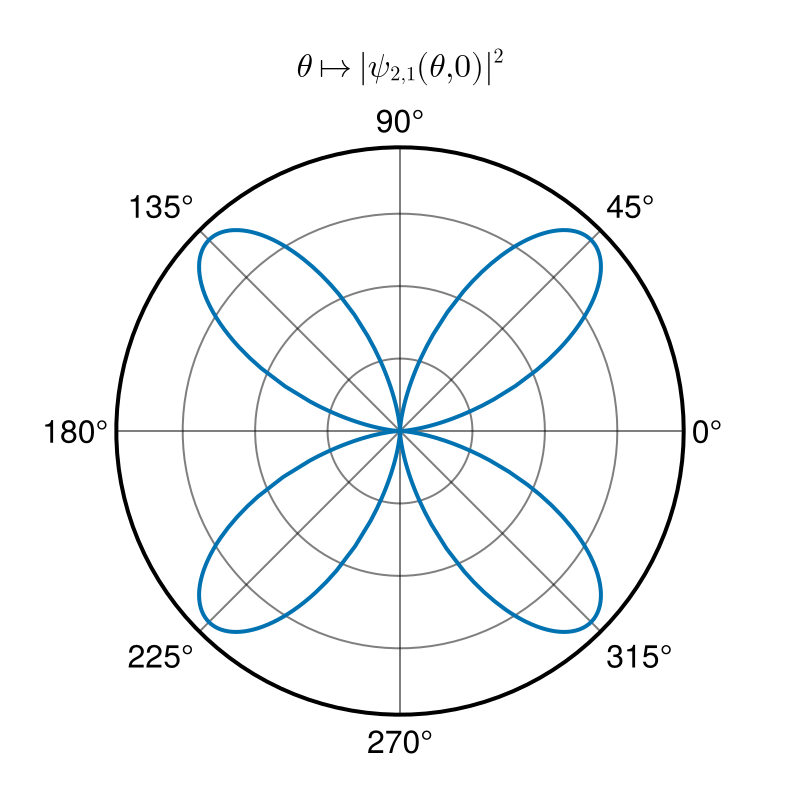

In [10]:
using CairoMakie

f = Figure(size=(400,400))
ax = PolarAxis(f[1,1], title=L"$\theta\mapsto|\psi_{2,1}(\theta,0)|^2$", rticklabelsvisible=false)
lines!(ax, 0..2pi, θ->abs(ψ(RR,θ,0,l=2,m=1))^2, linewidth=2)

f

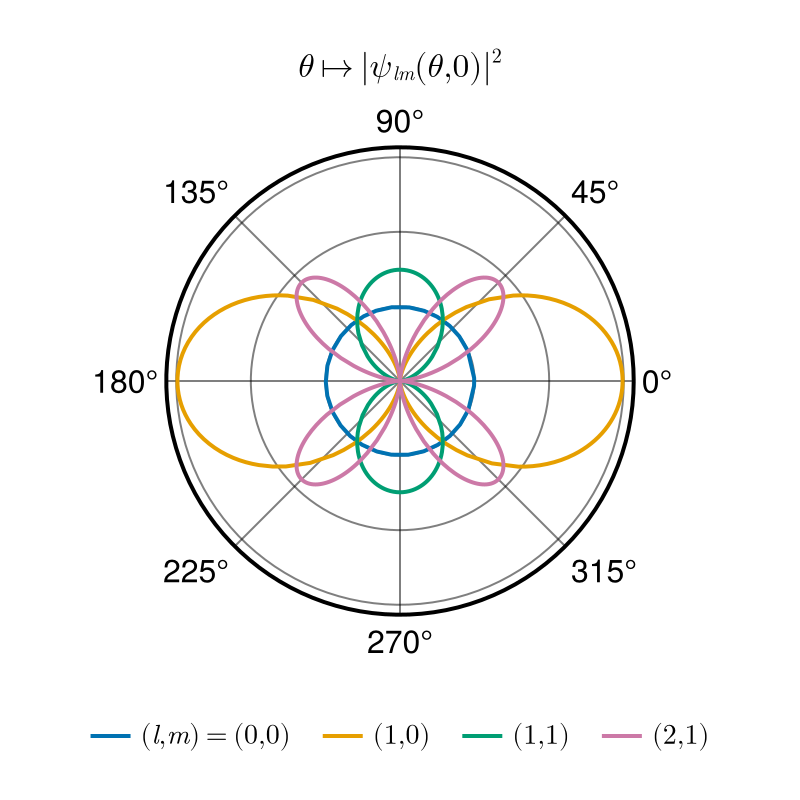

In [11]:
using CairoMakie

f = Figure(size=(400,400))
ax = PolarAxis(f[1,1], title=L"$\theta\mapsto|\psi_{lm}(\theta,0)|^2$", rticklabelsvisible=false)
l1 = lines!(ax, 0..2pi, θ->abs(ψ(RR,θ,0,l=0,m=0))^2, linewidth=2)
l2 = lines!(ax, 0..2pi, θ->abs(ψ(RR,θ,0,l=1,m=0))^2, linewidth=2)
l3 = lines!(ax, 0..2pi, θ->abs(ψ(RR,θ,0,l=1,m=1))^2, linewidth=2)
l4 = lines!(ax, 0..2pi, θ->abs(ψ(RR,θ,0,l=2,m=1))^2, linewidth=2)
Legend(f[2,1], [l1,l2,l3,l4], [L"(l,m)=(0,0)",L"(1,0)",L"(1,1)",L"(2,1)"], framevisible=false, orientation=:horizontal, tellwidth=false, tellheight=true)

f

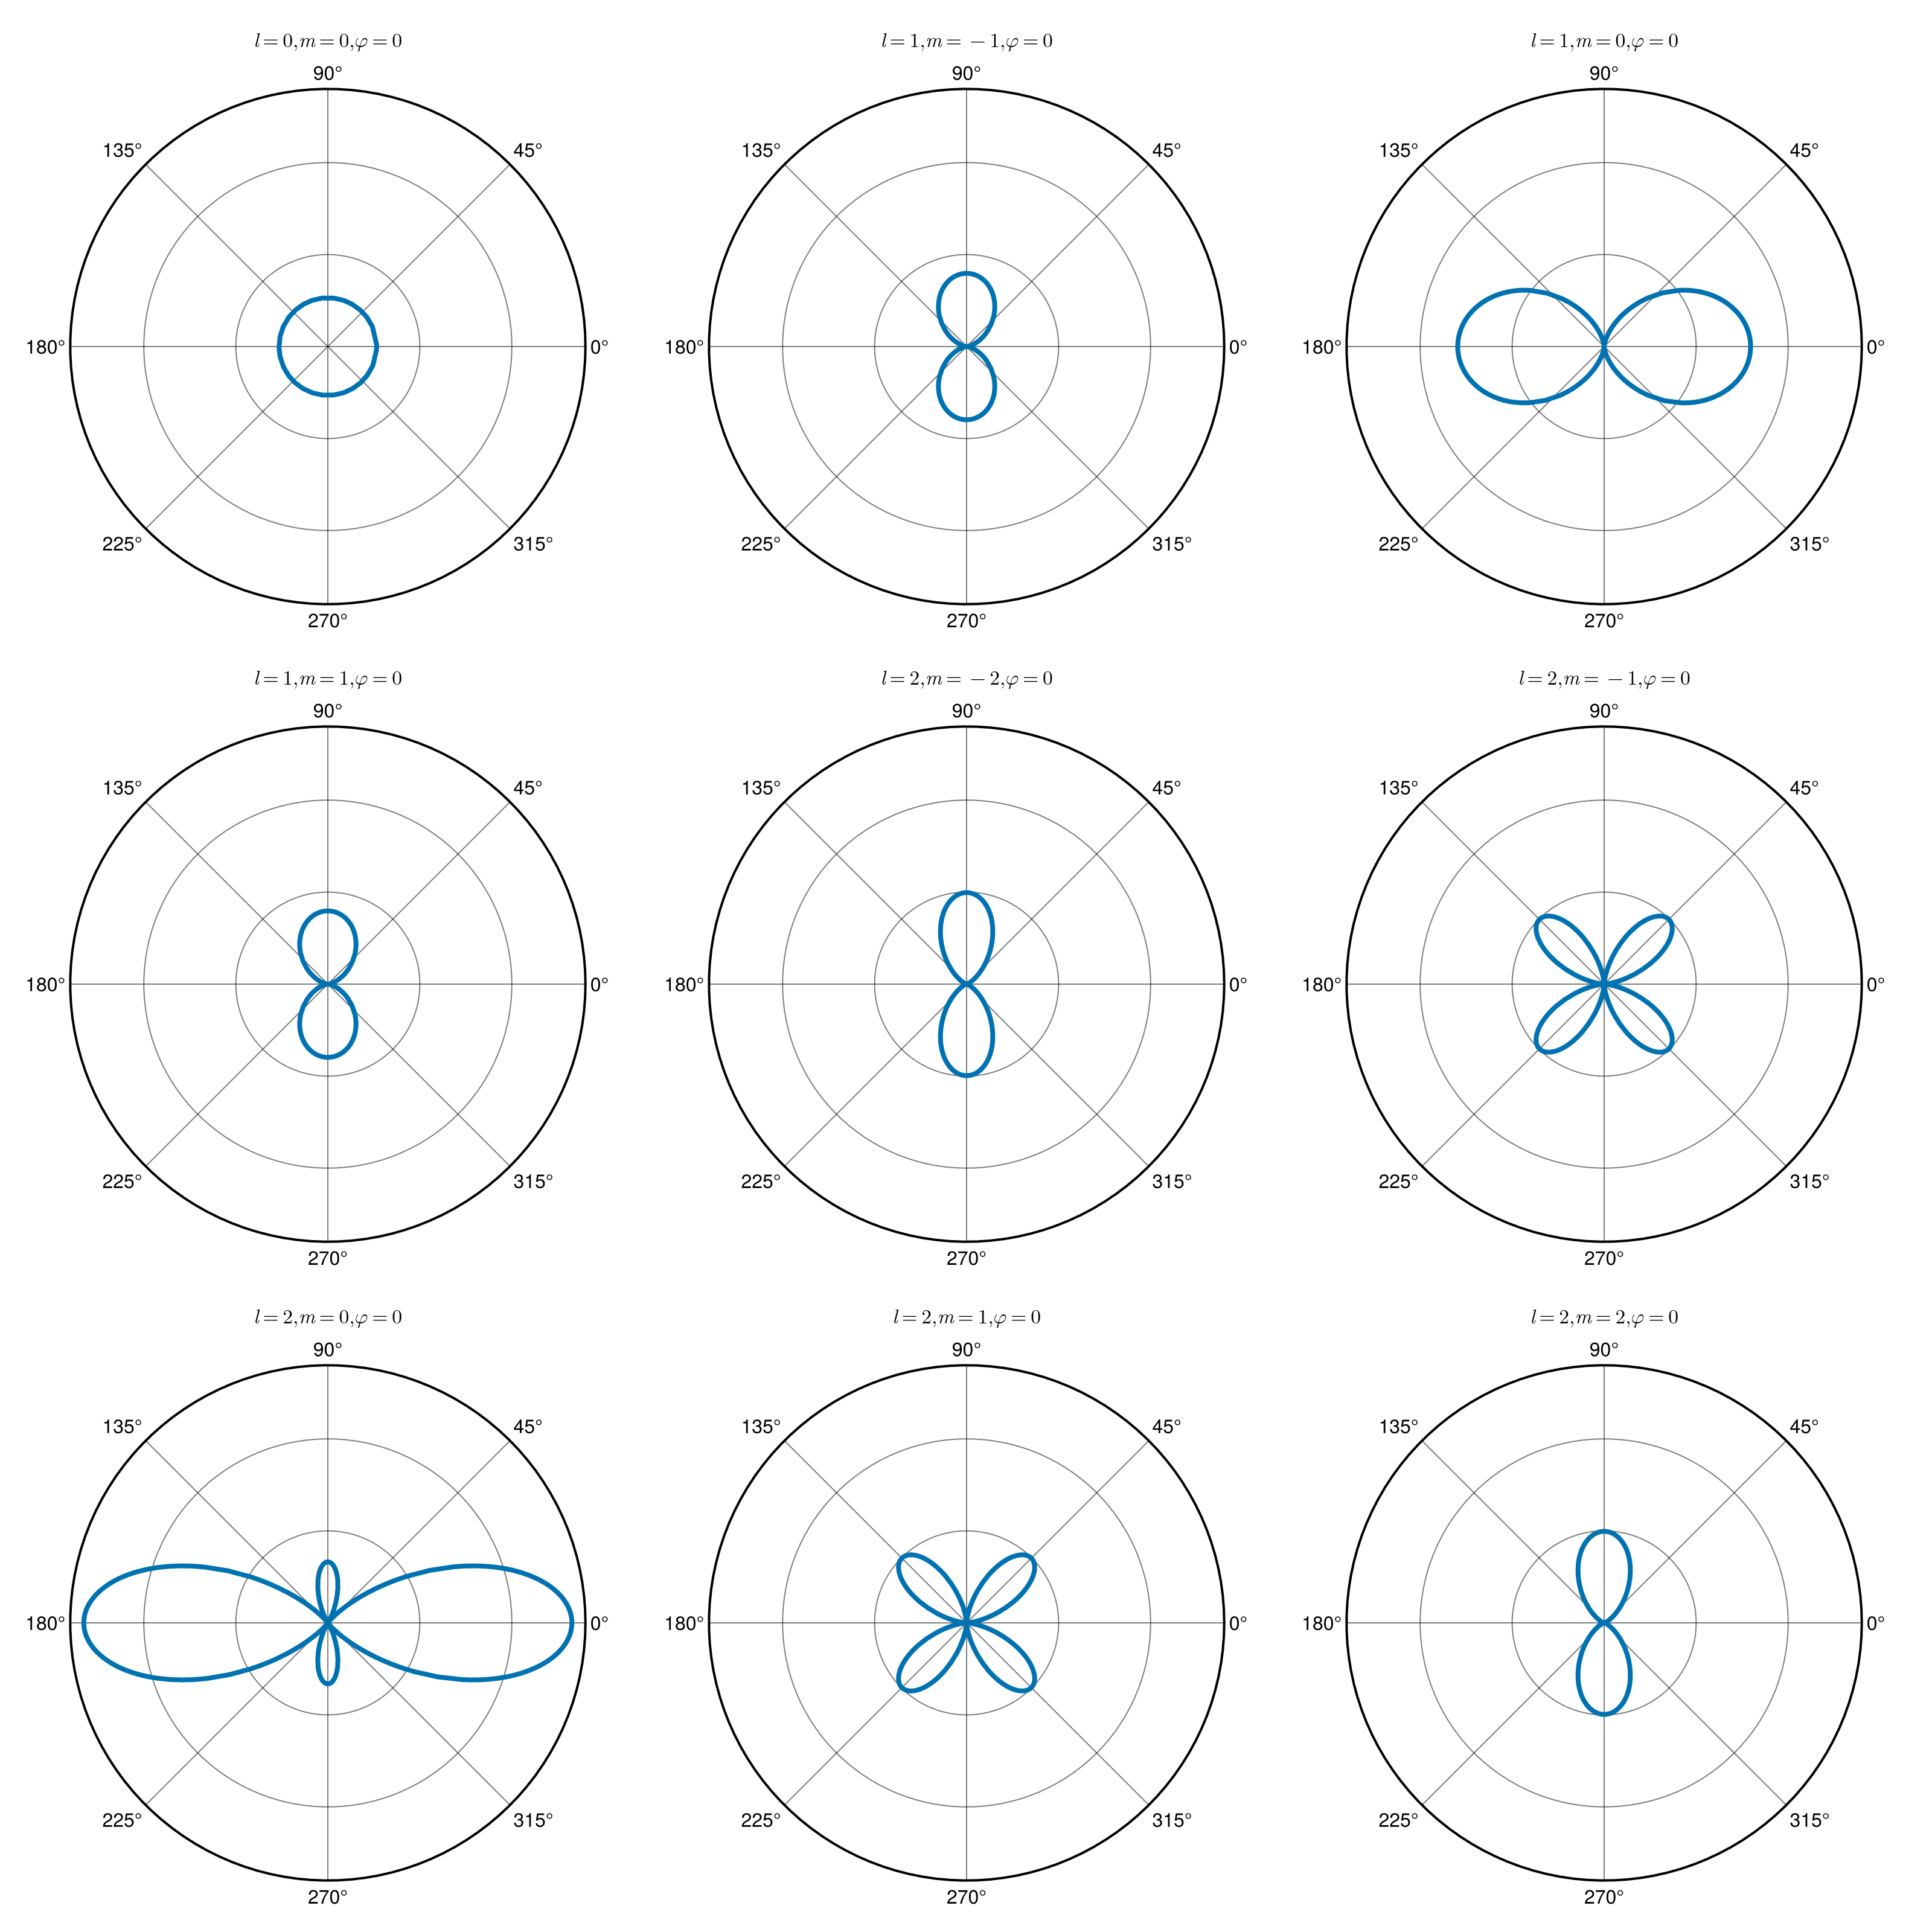

In [12]:
using CairoMakie
using LaTeXStrings

f = Figure(size=(1600,1600))

n = 0
for l in 0:2
  for m in -l:l
    global n += 1
    ax = PolarAxis(f[div(n-1,3)+1,mod(n-1,3)+1], rticklabelsvisible=false, title=latexstring("l=$l,m=$m,\\varphi=0"))
    rlims!(ax, 0, 0.42)
    lines!(ax, 0..2pi, θ->abs(ψ(RR,θ,0,l=l,m=m))^2, linewidth=4)
  end
end

f